In [6]:
import pandas as pd
import numpy as nnp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf


In [7]:
!pip install mlxtend

  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)


In [9]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori,association_rules
import warnings
warnings.filterwarnings('ignore')

In [11]:
books = pd.read_csv('book.csv')
books.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Pre Processing

In [12]:
df = pd.get_dummies(books)
df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


# Apriori Algorithm

In [13]:
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.423,(ChildBks)
1,0.431,(CookBks)


In [14]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [16]:
rules.sort_values('lift',ascending=False).head(15)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [17]:
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


In [18]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


# Scatterplot between variables along with histograms

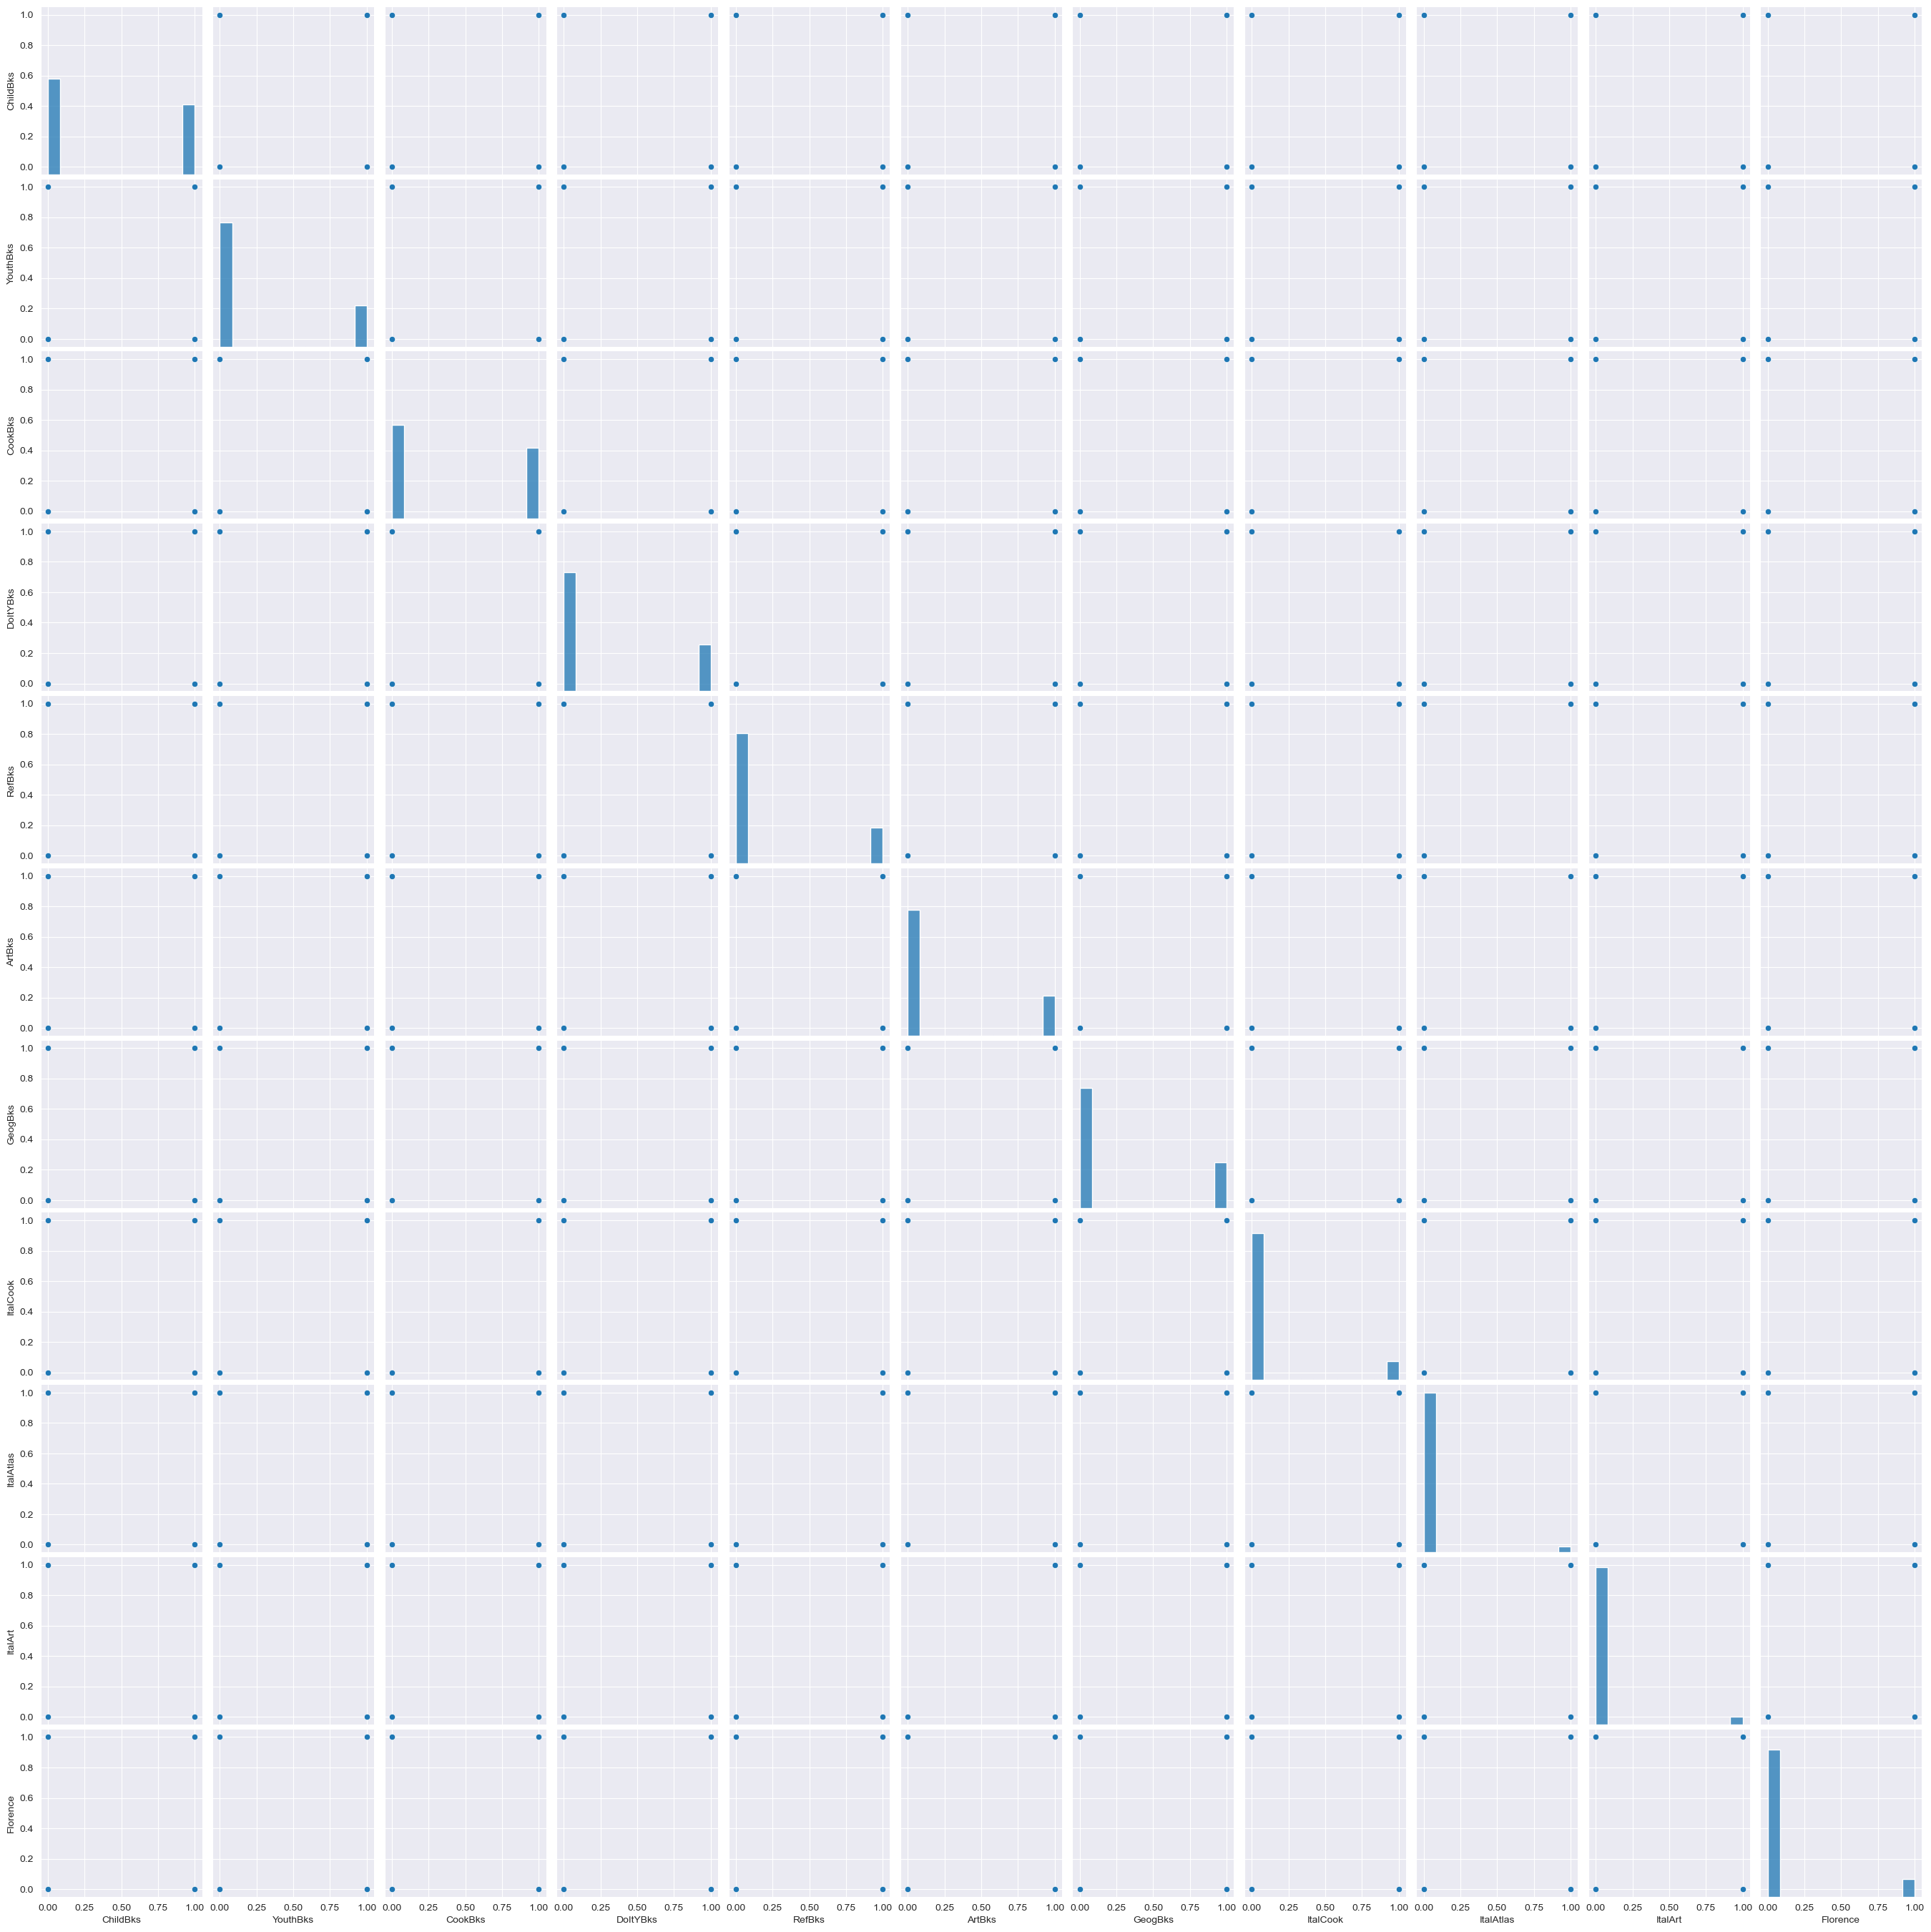

In [20]:
sns.set_style(style='darkgrid')
sns.pairplot(books)

In [ ]:
# Test for normality of Residual (Q-Q)